In [1]:
# LEAD SCORING CASE STUDY

In [2]:
# Objective

In [3]:
# Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which 
# can be used by the company to target potential leads. A higher score would mean that the lead is hot, 
# i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly 
# not get converted.

In [4]:
# Importing Libraries and Data Check

In [5]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns


import warnings

warnings.filterwarnings('ignore')

import statsmodels.api as sm


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns',37)

In [6]:
# csv data

lead = pd.read_csv(r"C:\Users\Rohit\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [8]:
# Dimensions of the dataframe

lead.shape

(9240, 37)

In [9]:
# Data types and null counts of columns

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
# check for duplicate

lead[lead.duplicated(keep = False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [11]:
# Missing Value Treatment

In [12]:
# Finding the percentage of missing values of each column

lead_missing_Per = round(100*lead.isnull().sum()/len(lead),2)

lead_missing_Per 

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# Deleting the columns 'Prospect ID' as there is no effect of these colums on model prediction

lead = lead.drop('Prospect ID', axis=1)

lead = lead.drop('Lead Number', axis=1)

In [14]:
# Finding the count of values from each type of Lead Source and source with most leads

lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [15]:
# Saving the highest lead generating source into the variable - lead_mode

lead_mode = lead['Lead Source'].mode()[0]

In [16]:
# Filling the missing values in the Lead Source column with the lead_mode variable 

lead['Lead Source'] = lead['Lead Source'].fillna('lead_mode')

lead['Lead Source'].isnull().sum()

0

In [17]:
# Filling in the missing values in the Total Visits column with the median value 

lead['TotalVisits'] = lead['TotalVisits'].fillna(lead['TotalVisits'].median())

lead['TotalVisits'].isnull().sum()

0

In [18]:
# Finding the mean of Page Views Per Visit column 

lead['Page Views Per Visit'].mean()

2.3628199494672093

In [19]:
# Filling in the missing values in the Page Views Per Visit column with the mean value 

lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].mean())

lead['Page Views Per Visit'].isnull().sum()

0

In [20]:
# Filling in the missing values in the Lead Activity column with the mode value 

lead['Last Activity'] = lead['Last Activity'].fillna('Email Opened')

lead['Last Activity'].isnull().sum()

0

In [21]:
# India value vs other values
(lead['Country']!='India').value_counts()

False    6492
True     2748
Name: Country, dtype: int64

In [22]:
# Filling in the missing values in the Country column with the value India (largest value)

lead['Country'] = lead['Country'].fillna('India')

lead['Country'].isnull().sum()

0

In [23]:
# Observing the count of data items in the Specialization column 

lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
# Filling in the missing values in the Specialization column with the value 'Select' - This value is equivalent to a Null selection

lead['Specialization'] = lead['Specialization'].fillna('Select')

lead['Specialization'].isnull().sum()

0

In [25]:
# Observing the count of data items in the "How did you hear about X Education column" 

lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [26]:
# Filling in the missing values in the How did you hear about X Education column with the value 'Select' - This value is equivalent to a Null selection

lead['How did you hear about X Education'] = lead['How did you hear about X Education'].fillna('Select')

lead['How did you hear about X Education'].isnull().sum()

0

In [27]:
# Filling in the missing values in the What is your current occupation column with the value 'Not Provided' - This value is equivalent to a Null selection

lead['What is your current occupation'] = lead['What is your current occupation'].fillna('Not Provided')

lead['What is your current occupation'].isnull().sum()

0

In [28]:
# Observing the count of data items in "What matters most to you in choosing a course" column 

lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
# Dropping "What matters most to you in choosing a course" column

lead = lead.drop(['What matters most to you in choosing a course'],1)

In [30]:
# Most frequent value in the Tags column 

lead['Tags'].mode()

0    Will revert after reading the email
Name: Tags, dtype: object

In [31]:
# Filling in the missing values in the Tags column with the value 'Will revert after reading the email' 

lead['Tags'] = lead['Tags'].fillna('Will revert after reading the email')

In [32]:
# Dropping the columns more than 30% null values

lead = lead.drop('Lead Quality', axis=1)

lead = lead.drop('Lead Profile', axis=1)

lead = lead.drop('City', axis=1)

lead = lead.drop('Asymmetrique Profile Index', axis=1)

lead = lead.drop('Asymmetrique Activity Index', axis=1)

lead = lead.drop('Asymmetrique Activity Score', axis=1)

lead = lead.drop('Asymmetrique Profile Score', axis=1)


In [33]:
# Outlier Treatment

In [34]:
# Understanding the numerical columns and looking at the various percentiles of the data 

lead.describe(percentiles = [.25,.5,.75,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.362820
std,0.486714,4.819024,548.021466,2.145333
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000
max,1.000000,251.000000,2272.000000,55.000000


In [35]:
# Leaving the target column - Converted 
# Saving all the other columns in a variable called feature for our further analysis

feature = lead.columns[5:8]

for i in enumerate(feature):
    print(i)

(0, 'TotalVisits')
(1, 'Total Time Spent on Website')
(2, 'Page Views Per Visit')


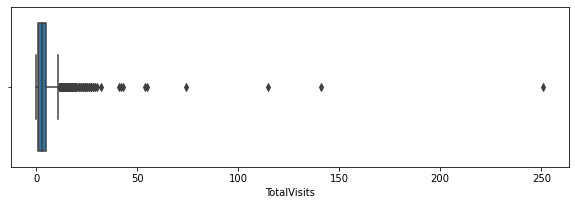

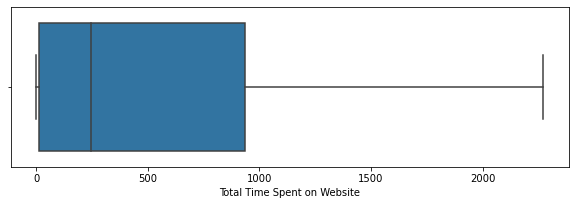

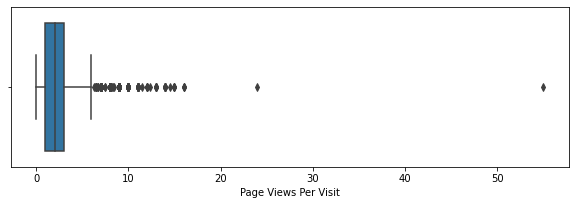

In [36]:
# Boxplots of the numerical columns 

feature = lead.columns[5:8]

for i in enumerate(feature):
    plt.figure(figsize = (10,10))
    plt.subplot(3,1, i[0]+1)
    sns.boxplot(lead[i[1]])

In [37]:
# Removing the rows where the Total Visits are more than 17

lead = lead[(lead.TotalVisits <= 17) ]


# Removing the rows where the Page Views Per Visit are more than 9

lead = lead[(lead['Page Views Per Visit'] <= 9)]

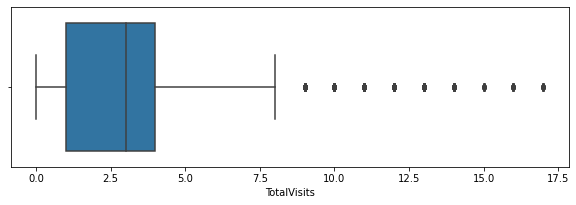

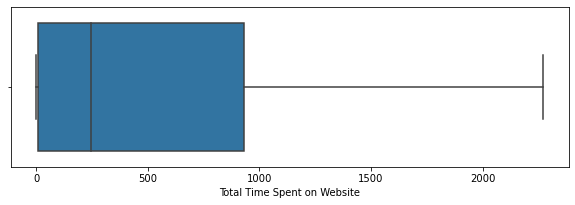

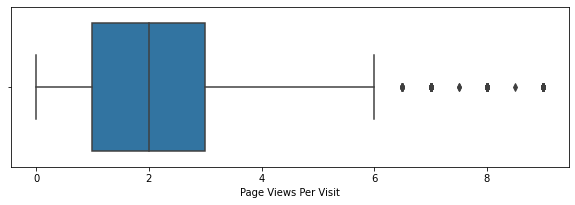

In [38]:
# Boxplots for the numerical feature columns

feature = lead.columns[5:8]

for i in enumerate(feature):
    plt.figure(figsize = (10,10))
    plt.subplot(3,1, i[0]+1)
    sns.boxplot(lead[i[1]])

In [39]:
# Percentage of data retention

num_data = round(100*(len(lead)/9240),2)

print(num_data)

98.38


In [40]:
# Final dimensions of the dataframe

lead.shape

(9090, 27)

In [41]:
# Exploratory Data Analysis

In [42]:
# Univariate Analysis

In [43]:
# Data types of the columns of the dataframe
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9090 non-null   object 
 1   Lead Source                               9090 non-null   object 
 2   Do Not Email                              9090 non-null   object 
 3   Do Not Call                               9090 non-null   object 
 4   Converted                                 9090 non-null   int64  
 5   TotalVisits                               9090 non-null   float64
 6   Total Time Spent on Website               9090 non-null   int64  
 7   Page Views Per Visit                      9090 non-null   float64
 8   Last Activity                             9090 non-null   object 
 9   Country                                   9090 non-null   object 
 10  Specialization                      

In [44]:
#Creating a new dataframe lead1 (data is grouped by the target varibale - Converted) 

lead1 = lead.groupby('Converted').count()

lead1.reset_index()

,Converted,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595
1,1,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495


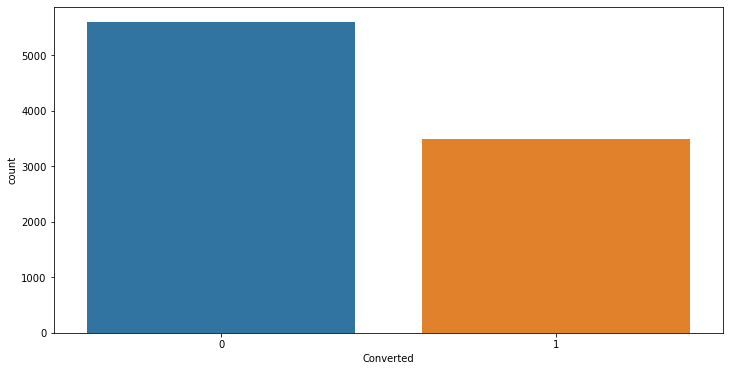

In [45]:
# Countplot of "Converted" 

fig, axs = plt.subplots(figsize = (12,6))

sns.countplot(x= "Converted", data=lead)

plt.show()

In [46]:
# Inference :  Most of the leads are not converted successfully

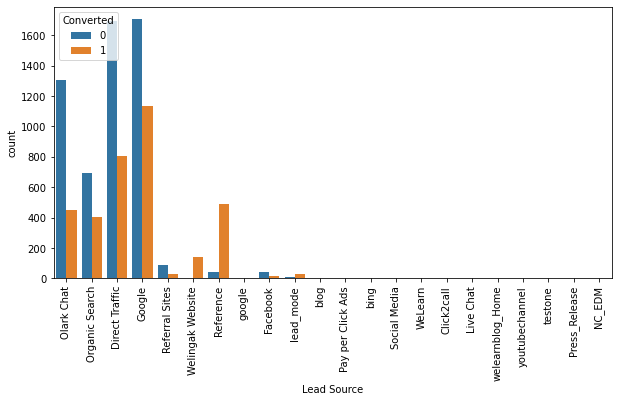

In [47]:
# Plotting the Converted variable against the Lead Source to determine which Sources contribute most to the Converted leads

fig, axs = plt.subplots(figsize = (10,5))

sns.countplot(x="Lead Source", hue="Converted", data=lead,orient='h' )

plt.xticks(rotation = 90)

plt.show()

In [48]:
#Inferences :  

#Majority of successful conversions - The leads from Direct Traffic and Google

#The proportion of leads that get converted from the References source is much much higher than other categories

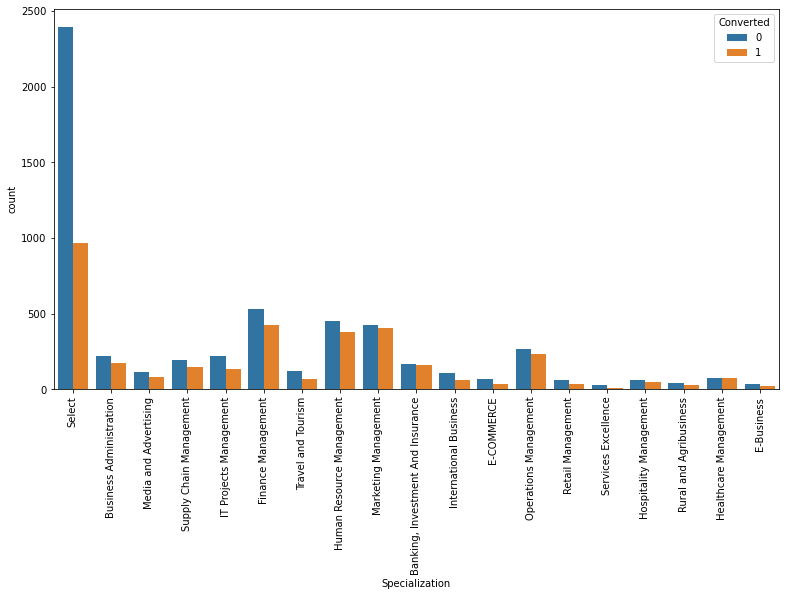

In [49]:
# Plotting the Converted variable against the Specialization to determine leads from which previous Specialization contribute most to the Converted leads

plt.subplots(figsize = (13,7))

sns.countplot(lead.Specialization,hue = lead.Converted)

plt.xticks(rotation = 90)

plt.show()

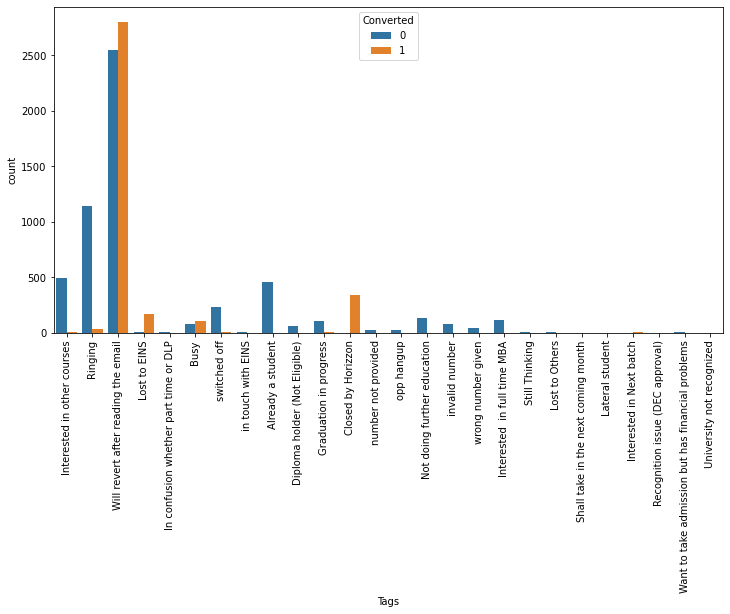

In [50]:
# Plotting the Converted variable against the Tags to determine the current state of the lead and the conversion variable

plt.subplots(figsize = (12,6))

sns.countplot(lead['Tags'] ,hue = lead.Converted)

plt.xticks(rotation = 90)

plt.show()

In [51]:
# Inferences : 

# Most of the lead have their Email opened as their last activity

# Conversion rate for leads with last activity as SMS Sent is good

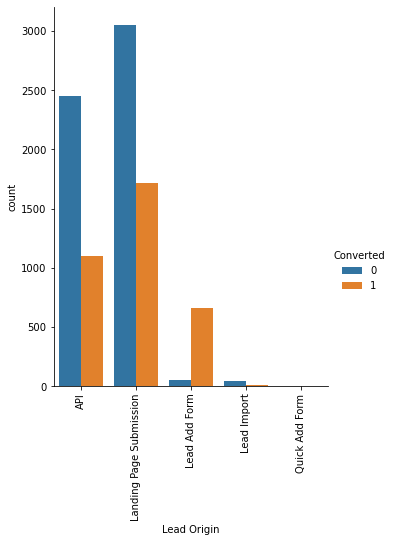

In [52]:
# Plotting the Converted variable against the Lead Origin to determine the relationship between the two variables

sns.catplot(x="Lead Origin", hue="Converted",data=lead, kind="count",height=6, aspect=.8)

plt.xticks(rotation = 90)

plt.show()

In [53]:
# Inferences :  

# Better Conversion rate - Landing Page Submission

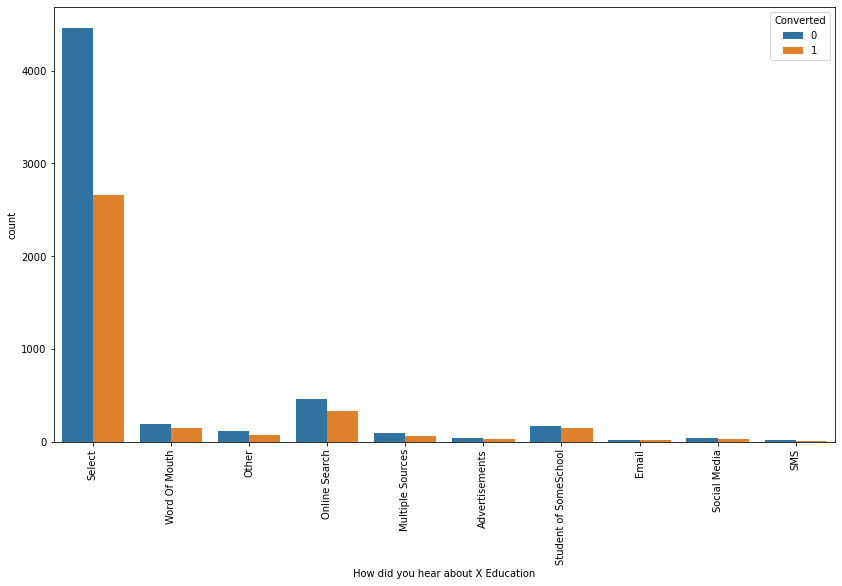

In [54]:

plt.subplots(figsize = (14,8))

sns.countplot('How did you hear about X Education',hue="Converted", data = lead)

plt.xticks(rotation = 90)

plt.show()

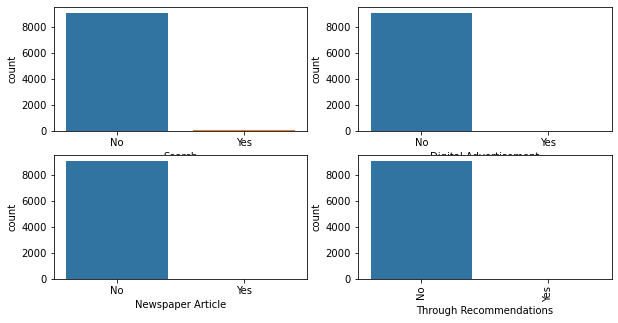

In [55]:
# Countplots of variables

plt.subplots(figsize = (10,5))
plt.subplot(2,2,1)
sns.countplot('Search' ,data = lead)

plt.subplot(2,2,2)
sns.countplot('Digital Advertisement' ,data = lead)

plt.subplot(2,2,3)
sns.countplot('Newspaper Article' ,data = lead)

plt.subplot(2,2,4)
sns.countplot('Through Recommendations' ,data = lead)

plt.xticks(rotation = 90)
plt.show()


In [56]:
# Inferences :  

# Not much conversion wrt Search, Digital Advertisement, Newspaper Article, or Through Recommendations

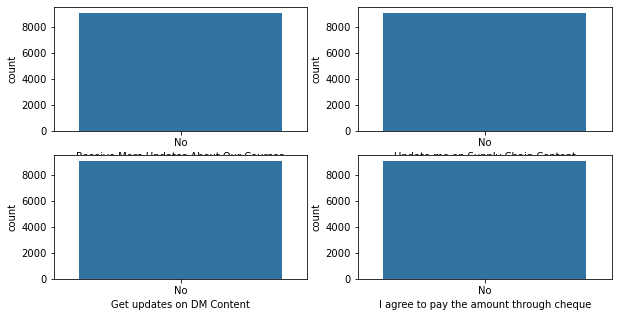

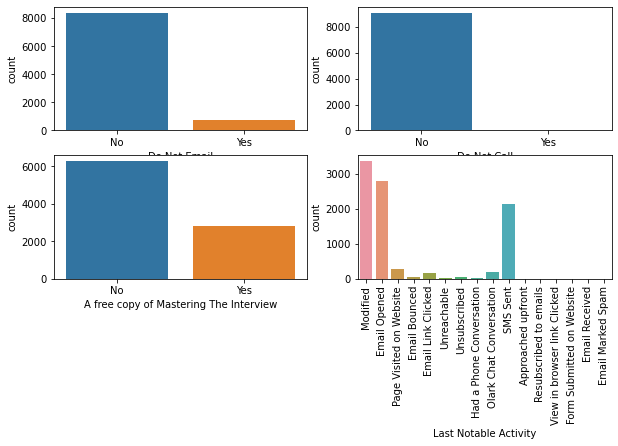

In [57]:
# Countplots of other variables

plt.subplots(figsize = (10,5))
plt.subplot(2,2,1)
sns.countplot('Receive More Updates About Our Courses' ,data = lead)

plt.subplot(2,2,2)
sns.countplot('Update me on Supply Chain Content' ,data = lead)

plt.subplot(2,2,3)
sns.countplot('Get updates on DM Content' ,data = lead)

plt.subplot(2,2,4)
sns.countplot('I agree to pay the amount through cheque' ,data = lead)

plt.subplots(figsize = (10,5))
plt.subplot(2,2,1)
sns.countplot('Do Not Email' ,data = lead)

plt.subplot(2,2,2)
sns.countplot('Do Not Call' ,data = lead)

plt.subplot(2,2,3)
sns.countplot('A free copy of Mastering The Interview' ,data = lead)

plt.subplot(2,2,4)
sns.countplot('Last Notable Activity' ,data = lead)

plt.xticks(rotation = 90)

plt.show()


In [58]:
# Inference : 

# Most of the above reflect poor conversion rates

In [59]:
# Multi-Variate Analysis

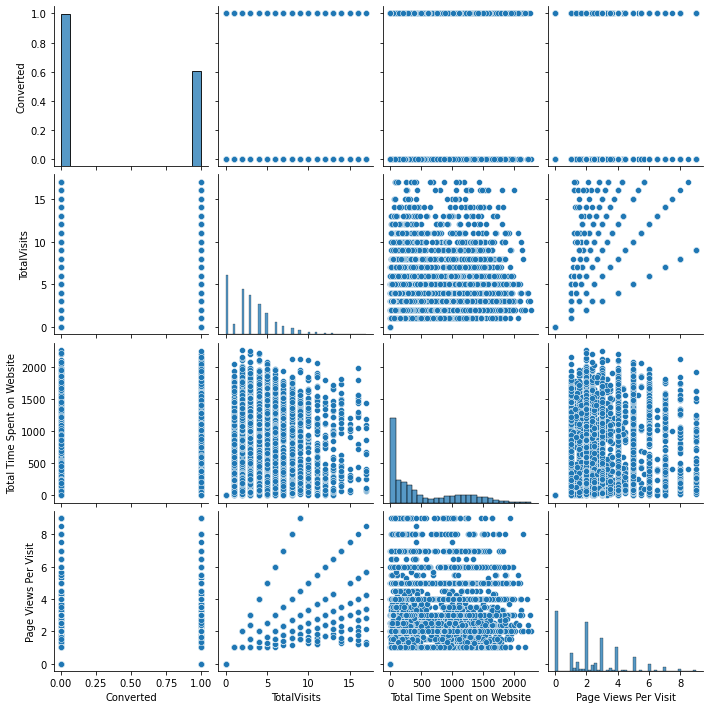

In [60]:
sns.pairplot(lead)

plt.show()

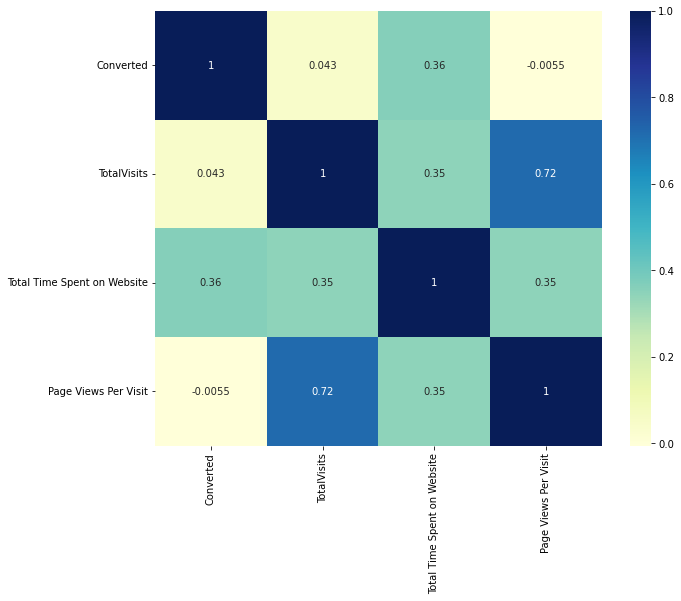

In [61]:
# Heatmap for corelation.

plt.figure(figsize = (10,8)) 

sns.heatmap(lead.corr(),annot = True,cmap="YlGnBu")

plt.show()

In [62]:
# Inference : 
    
# Total visits vs Page views per visit has maximum correlation

In [63]:
# Data Preparation

In [64]:
# Dropping Columns with no significance

lead = lead.drop(['Do Not Email', 'Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content','Tags',
       'I agree to pay the amount through cheque'],axis = 1)

In [65]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Select,Select,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,No,Modified


In [66]:
lead.shape

(9090, 13)

In [67]:
# Making dummies for Categorial Variables

dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe

lead1 = pd.concat([lead, dummy1], axis=1)

In [68]:
# Dropping the original variable after dummies' creation

lead1 = lead1.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis = 1)

In [69]:
# Head of updated dataframe

lead1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [70]:
# Train Test Split

In [71]:
# Removing the target variable from lead1 and saving it to new dataframe X, for the modeling

X = lead1.drop(['Converted'],axis = 1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [72]:
# Saving the target variable into a new dataframe Y

Y = lead1['Converted']

Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [73]:
# Splitting the dataframes X and Y into train and test

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [74]:
# Head of the X_train dataframe
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4083,2.0,335,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7309,3.0,39,3.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7613,3.0,176,3.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8659,12.0,25,6.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8829,1.0,49,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [75]:
# Head of the Y_train dataframe
Y_train.head()

4083    0
7309    0
7613    0
8659    0
8829    0
Name: Converted, dtype: int64

In [76]:
# Head of the X_test dataframe
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3343,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2600,3.0,140,3.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3115,7.0,402,7.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1348,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4525,4.0,1701,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [77]:
# Feature Scaling

In [78]:
# Scaling the selected features

from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

In [79]:
# Scaling the chosen features

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = Scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [80]:
# Converted rate

converted_Rate = (sum(lead1['Converted'])/len(lead1['Converted']))*100

converted_Rate

38.448844884488445

In [81]:
# GLM function on X_train and Y_train

logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

In [82]:
# Summary of the GLM Regression

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7147
Model Family:                Binomial   Df Model:                          124
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 22 Nov 2022   Deviance:                   1.8117e+05
Time:                        22:56:24   Pearson chi2:                 8.86e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                    -1.221e+15   8.68e+07  -1.41e+07      0.000   -1.22e+15   -1.22e+15
TotalVisits                                                1.77e+14   1.25e+06   1.41e+08      0.000    1.77e+14    1.77e+14
Total Time Spent on Website                               7.179e+14   9.06e+05   7.92e+08      0.000    7.18e+14    7.18e+14
Page Views Per Visit                                     -2.066e+14   1.34e+06  -1.54e+08      0.000   -2.07e+14   -2.07e+14
Lead Origin_Landing Page Submission                      -3.345e+14    3.7e+06  -9.03e+07      0.000   -3.34e+14   -3.34e+14
Lead Origin_Lead Add Form                                -4.201e+14   3.38e+07  -1.24e+07      0.000    -4.2e+14    -4.2e+14
Lead Origin_Lead Import                                   2.845e+15   7.06e+07   4.03e+07      0.000    2.84e+15    2.84e+15
Lead Origin_Quick Add Form                                5.362e+14   7.69e+07   6.97e+06      0.000    5.36e+14    5.36e+14
Lead Source_Direct Traffic                                4.817e+14   5.16e+07   9.33e+06      0.000    4.82e+14    4.82e+14
Lead Source_Facebook                                     -1.719e+15   8.68e+07  -1.98e+07      0.000   -1.72e+15   -1.72e+15
Lead Source_Google                                         7.47e+14   5.16e+07   1.45e+07      0.000    7.47e+14    7.47e+14
Lead Source_Live Chat                                     6.849e+15   6.15e+07   1.11e+08      0.000    6.85e+15    6.85e+15
Lead Source_NC_EDM                                        4.538e+15   8.52e+07   5.32e+07      0.000    4.54e+15    4.54e+15
Lead Source_Olark Chat                                    4.849e+14   5.16e+07    9.4e+06      0.000    4.85e+14    4.85e+14
Lead Source_Organic Search                                6.087e+14   5.16e+07   1.18e+07      0.000    6.09e+14    6.09e+14
Lead Source_Pay per Click Ads                            -3.784e+15   8.48e+07  -4.46e+07      0.000   -3.78e+15   -3.78e+15
Lead Source_Press_Release                                -3.473e+15    8.5e+07  -4.08e+07      0.000   -3.47e+15   -3.47e+15
Lead Source_Reference                                     1.746e+15   3.91e+07   4.47e+07      0.000    1.75e+15    1.75e+15
Lead Source_Referral Sites                                 5.64e+14    5.2e+07   1.08e+07      0.000    5.64e+14    5.64e+14
Lead Source_Social Media                                  2.606e+14   7.03e+07   3.71e+06      0.000    2.61e+14    2.61e+14
Lead Source_WeLearn                                        -32.0829   1.88e-06   -1.7e+07      0.000     -32.083     -32.083
Lead Source_Welingak Website                              2.433e+15   3.95e+07   6.

In [83]:
# RFE - Feature Selection

In [84]:
# Splitting the dataframes X and Y into train and test

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [85]:
# Head of the X_train dataframe
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4083,2.0,335,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7309,3.0,39,3.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7613,3.0,176,3.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8659,12.0,25,6.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8829,1.0,49,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [86]:
# Head of the Y_train dataframe
Y_train.head()

4083    0
7309    0
7613    0
8659    0
8829    0
Name: Converted, dtype: int64

In [87]:
# Head of the X_test dataframe
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3343,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2600,3.0,140,3.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3115,7.0,402,7.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1348,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4525,4.0,1701,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [88]:
# Using the Logistic Regression function

logreg = LogisticRegression()

In [89]:
# Import RFE and select 15 variables\n
import numpy as np
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 15)             # running RFE with 15 variables as output\n",
rfe = rfe.fit(X_train, Y_train)

In [90]:
#Checking the rfe.support_ array

rfe.support_

array([False, False, False,  True,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False,  True, False,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True,  True, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
        True,  True, False,  True,  True,  True, False, False,  True,
       False,  True, False, False,  True,  True, False,  True,  True,
        True,  True,

In [91]:
# Printing all the features after the RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 6),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', True, 1),
 ('Lead Source_Press_Release', False, 6),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 5),
 ('Lead Source_blog', False, 5),
 ('Lead Source_google', False, 3),
 ('Lead Source_lead_mode', False, 3),
 ('Lead Source_testone',

In [92]:
# Printing the columns not selected

X_train.columns[~ rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_lead_mode',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Page Visited on Website',
       'Last Activity_Visited Booth in Tradeshow', 'Country_Bahrain',
       'Country_Bangladesh', 'Country_Belgium', 'Country_China',
       'Country_Denmark', 'Country_France', 'Country_Germany', 'Country_Ghana',
       'Country_Hong Kong', 'Country_Kenya', 'Country_Kuwait',
       'Country_Liberia', 'Country_Malaysia', 'Country_Philippines',
       'Country_Russia', 'Country_South Afri

In [93]:
# Saving the selected feature list in the col variable

col = X_train.columns[rfe.support_]

In [94]:
# Printing the selected feature list in saved in the col variable

col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked', 'Country_Australia',
       'Country_Canada', 'Country_India', 'Country_Indonesia', 'Country_Italy',
       'Country_Netherlands', 'Country_Nigeria', 'Country_Oman',

In [95]:
#Dropping Tags_Interested in Next batch

col = col.drop('Last Activity_Resubscribed to emails')

col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked', 'Country_Australia',
       'Country_Canada', 'Country_India', 'Country_Indonesia', 'Country_Italy',
       'Country_Netherlands', 'Country_Nigeria', 'Country_Oman',
       'Country_Qatar', 'Country_Saudi Arabia'

In [96]:
# Checking the model details

X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial()) 

logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7207
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3368.8
Date:                Tue, 22 Nov 2022   Deviance:                       6737.6
Time:                        22:56:26   Pearson chi2:                 7.30e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3335
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0897      0.757      1.439      0.150      -0.395       2.574
Lead Origin_Landing Page Submission                     -0.9917      0.119     -8.353      0.000      -1.224      -0.759
Lead Origin_Lead Add Form                                1.4207      0.484      2.935      0.003       0.472       2.370
Lead Origin_Lead Import                                 21.0114   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -0.1854      0.090     -2.063      0.039      -0.362      -0.009
Lead Source_Facebook                                   -21.8268   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_NC_EDM                                      24.9728   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Pay per Click Ads                          -23.2540   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    0.4493      0.515      0.872      0.383      -0.561       1.459
Lead Source_Social Media                                 1.3115      1.420      0.924      0.356      -1.472       4.095
Lead Source_Welingak Website                             2.9355      0.863      3.400      0.001       1.243       4.628
Lead Source_testone                                    -22.9622   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Converted to Lead                         -0.4890      0.232     -2.108      0.035      -0.944      -0.034
Last Activity_Email Bounced                             -1.2804      0.305     -4.195      0.000      -1.879      -0.682
Last Activity_Email Opened                               0.5241      0.185      2.834      0.005       0.162       0.887
Last Activity_Email Received                            21.9898   5.57e+04      0.000      1.000   -1.09e+05    1.09e+05
Last Activity_Form Submitted on Website                 -0.1966      0.318     -0.619      0.536      -0.820       0.426
Last Activity_Had a Phone Conversation                  -0.0184      0.739     -0.025      0.980      -1.466       1.429
Last Activity_Olark Chat Conversation                   -0.9436      0.220     -4.298      0.000      -1.374      -0.513
Last Activity_SMS Sent                                   0.8745      0.191      4.571      0.000       0.500       1.250
Last Activity_Unreachable                               -0.5120      0.478     -1.071      0.284      -1.449       0.425
Last Activity_Unsubscribed                              -0.4133      0.495     -0.834      0.404      -1.384       0.558
Last Activity_View in browser link Clicked             -22

In [97]:
# Dropping Country

col = col.drop('Country_Italy')

In [98]:
#Checking the model details

X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial())

logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7208
Model Family:                Binomial   Df Model:                           63
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3370.0
Date:                Tue, 22 Nov 2022   Deviance:                       6740.0
Time:                        22:56:26   Pearson chi2:                 7.30e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3332
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9322      0.754      1.236      0.216      -0.546       2.410
Lead Origin_Landing Page Submission                     -0.9915      0.119     -8.353      0.000      -1.224      -0.759
Lead Origin_Lead Add Form                                1.4211      0.484      2.936      0.003       0.473       2.370
Lead Origin_Lead Import                                 21.0083   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -0.1856      0.090     -2.065      0.039      -0.362      -0.009
Lead Source_Facebook                                   -21.8242   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_NC_EDM                                      24.9722   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Pay per Click Ads                          -23.2553   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    0.4484      0.515      0.870      0.384      -0.561       1.458
Lead Source_Social Media                                 1.3103      1.420      0.923      0.356      -1.473       4.093
Lead Source_Welingak Website                             2.9350      0.863      3.400      0.001       1.243       4.627
Lead Source_testone                                    -22.9637   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Converted to Lead                         -0.4893      0.232     -2.109      0.035      -0.944      -0.035
Last Activity_Email Bounced                             -1.2794      0.305     -4.191      0.000      -1.878      -0.681
Last Activity_Email Opened                               0.5239      0.185      2.832      0.005       0.161       0.886
Last Activity_Email Received                            21.9885   5.57e+04      0.000      1.000   -1.09e+05    1.09e+05
Last Activity_Form Submitted on Website                 -0.1954      0.318     -0.615      0.539      -0.819       0.428
Last Activity_Had a Phone Conversation                  -0.0191      0.739     -0.026      0.979      -1.467       1.429
Last Activity_Olark Chat Conversation                   -0.9429      0.220     -4.295      0.000      -1.373      -0.513
Last Activity_SMS Sent                                   0.8768      0.191      4.583      0.000       0.502       1.252
Last Activity_Unreachable                               -0.5127      0.478     -1.072      0.284      -1.450       0.425
Last Activity_Unsubscribed                              -0.4138      0.496     -0.835      0.404      -1.385       0.557
Last Activity_View in browser link Clicked             -22

In [99]:
# Dropping What is your current occupation_Housewife

col = col.drop('Country_Nigeria')

In [100]:

X_train_sm = sm.add_constant(X_train[col])

logm5 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial())

logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7209
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3371.2
Date:                Tue, 22 Nov 2022   Deviance:                       6742.4
Time:                        22:56:27   Pearson chi2:                 7.31e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3330
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7653      0.749      1.022      0.307      -0.702       2.233
Lead Origin_Landing Page Submission                     -0.9933      0.119     -8.369      0.000      -1.226      -0.761
Lead Origin_Lead Add Form                                1.4205      0.484      2.935      0.003       0.472       2.369
Lead Origin_Lead Import                                 21.0070   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -0.1848      0.090     -2.057      0.040      -0.361      -0.009
Lead Source_Facebook                                   -21.8225   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_NC_EDM                                      24.9716   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Pay per Click Ads                          -23.2551   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    0.4483      0.515      0.870      0.384      -0.561       1.458
Lead Source_Social Media                                 1.3100      1.420      0.923      0.356      -1.473       4.093
Lead Source_Welingak Website                             2.9351      0.863      3.400      0.001       1.243       4.627
Lead Source_testone                                    -22.9650   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Converted to Lead                         -0.4893      0.232     -2.109      0.035      -0.944      -0.035
Last Activity_Email Bounced                             -1.2780      0.305     -4.186      0.000      -1.876      -0.680
Last Activity_Email Opened                               0.5235      0.185      2.830      0.005       0.161       0.886
Last Activity_Email Received                            21.9865   5.57e+04      0.000      1.000   -1.09e+05    1.09e+05
Last Activity_Form Submitted on Website                 -0.1949      0.318     -0.613      0.540      -0.818       0.428
Last Activity_Had a Phone Conversation                  -0.0170      0.739     -0.023      0.982      -1.466       1.432
Last Activity_Olark Chat Conversation                   -0.9431      0.220     -4.295      0.000      -1.374      -0.513
Last Activity_SMS Sent                                   0.8791      0.191      4.594      0.000       0.504       1.254
Last Activity_Unreachable                               -0.5125      0.478     -1.072      0.284      -1.450       0.425
Last Activity_Unsubscribed                              -0.4137      0.496     -0.835      0.404      -1.385       0.558
Last Activity_View in browser link Clicked             -22

In [101]:
X_train_sm = sm.add_constant(X_train[col])

logm6 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial())

res = logm6.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7209
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3371.2
Date:                Tue, 22 Nov 2022   Deviance:                       6742.4
Time:                        22:56:27   Pearson chi2:                 7.31e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3330
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7653      0.749      1.022      0.307      -0.702       2.233
Lead Origin_Landing Page Submission                     -0.9933      0.119     -8.369      0.000      -1.226      -0.761
Lead Origin_Lead Add Form                                1.4205      0.484      2.935      0.003       0.472       2.369
Lead Origin_Lead Import                                 21.0070   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -0.1848      0.090     -2.057      0.040      -0.361      -0.009
Lead Source_Facebook                                   -21.8225   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_NC_EDM                                      24.9716   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Pay per Click Ads                          -23.2551   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    0.4483      0.515      0.870      0.384      -0.561       1.458
Lead Source_Social Media                                 1.3100      1.420      0.923      0.356      -1.473       4.093
Lead Source_Welingak Website                             2.9351      0.863      3.400      0.001       1.243       4.627
Lead Source_testone                                    -22.9650   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Converted to Lead                         -0.4893      0.232     -2.109      0.035      -0.944      -0.035
Last Activity_Email Bounced                             -1.2780      0.305     -4.186      0.000      -1.876      -0.680
Last Activity_Email Opened                               0.5235      0.185      2.830      0.005       0.161       0.886
Last Activity_Email Received                            21.9865   5.57e+04      0.000      1.000   -1.09e+05    1.09e+05
Last Activity_Form Submitted on Website                 -0.1949      0.318     -0.613      0.540      -0.818       0.428
Last Activity_Had a Phone Conversation                  -0.0170      0.739     -0.023      0.982      -1.466       1.432
Last Activity_Olark Chat Conversation                   -0.9431      0.220     -4.295      0.000      -1.374      -0.513
Last Activity_SMS Sent                                   0.8791      0.191      4.594      0.000       0.504       1.254
Last Activity_Unreachable                               -0.5125      0.478     -1.072      0.284      -1.450       0.425
Last Activity_Unsubscribed                              -0.4137      0.496     -0.835      0.404      -1.385       0.558
Last Activity_View in browser link Clicked             -22

In [102]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred[:10]

array([0.17947461, 0.05924501, 0.06821299, 0.17052629, 0.12201676,
       0.36603908, 0.03222832, 0.0904961 , 0.62135131, 0.33645836])

In [103]:
y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Converted_Prob':y_train_pred})

In [104]:
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.179475
1,0,0.059245
2,0,0.068213
3,0,0.170526
4,0,0.122017


In [105]:
# Optimal Cutoff Point

In [106]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.179475,1,1,0,0,0,0,0,0,0,0
1,0,0.059245,1,0,0,0,0,0,0,0,0,0
2,0,0.068213,1,0,0,0,0,0,0,0,0,0
3,0,0.170526,1,1,0,0,0,0,0,0,0,0
4,0,0.122017,1,1,0,0,0,0,0,0,0,0


In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

from sklearn import metrics

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384213  1.000000  0.000000
0.1   0.1  0.542767  0.977452  0.271550
0.2   0.2  0.681243  0.913028  0.536623
0.3   0.3  0.718784  0.858268  0.631755
0.4   0.4  0.771865  0.672870  0.833631
0.5   0.5  0.774340  0.613457  0.874721
0.6   0.6  0.767877  0.569792  0.891469
0.7   0.7  0.745187  0.388332  0.967843
0.8   0.8  0.725935  0.310666  0.985038
0.9   0.9  0.696920  0.222620  0.992854


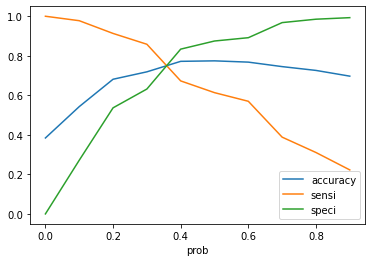

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

In [109]:
Inference :  

From the numnerical and the graph above, 0.4 is appropriate

SyntaxError: invalid syntax (3399923381.py, line 1)

In [110]:
# New Dataframe using cutoff 0.4

In [111]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)


In [112]:
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.179475,1,1,0,0,0,0,0,0,0,0,0
1,0,0.059245,1,0,0,0,0,0,0,0,0,0,0
2,0,0.068213,1,0,0,0,0,0,0,0,0,0,0
3,0,0.170526,1,1,0,0,0,0,0,0,0,0,0
4,0,0.122017,1,1,0,0,0,0,0,0,0,0,0


In [113]:
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))

y_train_pred_final.head(15)

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,lead_score
0,0,0.179475,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.059245,1,0,0,0,0,0,0,0,0,0,0,6
2,0,0.068213,1,0,0,0,0,0,0,0,0,0,0,7
3,0,0.170526,1,1,0,0,0,0,0,0,0,0,0,17
4,0,0.122017,1,1,0,0,0,0,0,0,0,0,0,12
5,1,0.366039,1,1,1,1,0,0,0,0,0,0,0,37
6,0,0.032228,1,0,0,0,0,0,0,0,0,0,0,3
7,0,0.090496,1,0,0,0,0,0,0,0,0,0,0,9
8,1,0.621351,1,1,1,1,1,1,1,0,0,0,1,62
9,0,0.336458,1,1,1,1,0,0,0,0,0,0,0,34


In [114]:
from sklearn import metrics

In [115]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )

print(confusion)

[[3733  745]
 [ 914 1880]]


In [116]:
# Overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7718646864686468


In [117]:
# VIF

In [118]:
# Check for the VIF values of the feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
vif = pd.DataFrame()

vif['Features'] = X_train[col].columns

vif['VIF'] = [variance_inflation_factor(X_train[col].values,i)for i in range (X_train[col].shape[1])]

vif['VIF']= round(vif['VIF'],2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
4,Lead Source_Facebook,49.75
2,Lead Origin_Lead Import,49.73
7,Lead Source_Reference,5.34
50,What is your current occupation_Student,4.50
9,Lead Source_Welingak Website,4.46
...,...,...
3,Lead Source_Direct Traffic,0.29
42,Specialization_Select,0.23
12,Last Activity_Email Bounced,0.12
47,How did you hear about X Education_Select,0.11


In [125]:
# Inferences : 

# Good VIF scores  =>  Can go ahead with the model

In [ ]:
# Metrics beyond simply accuracy

In [126]:
# Parameters

TP = confusion[1,1] # true positive 

TN = confusion[0,0] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [127]:
# Sensitivity of our logistic regression model

TP / float(TP+FN)

0.6728704366499642

In [128]:
# Specificity

TN / float(TN+FP)

0.8336310853059401

In [129]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.16636891469405984


In [130]:
# positive predictive value 

print (TP / float(TP+FP))

0.7161904761904762


In [131]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8033139659995696


In [132]:
# ROC Curve 

In [133]:
# Defining the draw_roc function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    
    plt.figure(figsize=(5, 5))
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlim([0.0, 1.0])
    
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    
    plt.ylabel('True Positive Rate')
    
    plt.title('Receiver operating characteristic example')
    
    plt.legend(loc="lower right")
    
    plt.show()

    return None

In [134]:
# Calculating and saving values to fpr, tpr and thresholds

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

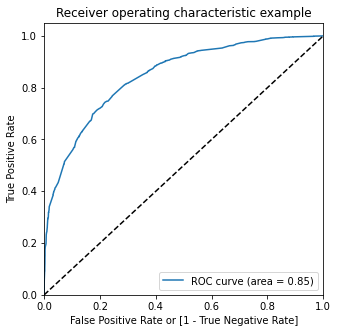

In [135]:
# Curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [136]:
# Precision and Recall

In [137]:
# Precision = TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7161904761904762

In [138]:
# Recall = TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6728704366499642

In [139]:
# Using sklearn 

In [140]:
#Importing precision_score, recall_score from sklearn.metrics

from sklearn.metrics import precision_score, recall_score

In [141]:
#Calculation using precision_score

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7161904761904762

In [142]:
#Calculation using recall_score

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6728704366499642

In [143]:
# Precision and Recall Tradeoff

In [144]:
# Importing precision_recall_curve from sklearn.metrics

from sklearn.metrics import precision_recall_curve

In [145]:
# Calculating the p,r, and threshold values using the precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

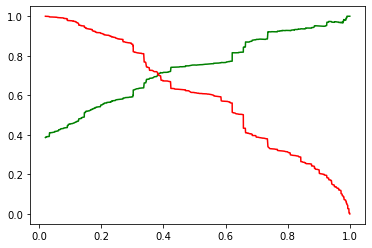

In [146]:
# Plot

plt.plot(thresholds, p[:-1], "g-")

plt.plot(thresholds, r[:-1], "r-")

plt.show()

In [147]:
# Predictions on the test set

In [148]:
# Using Scalar Trnsform on 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = Scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [149]:
# Using the selected columns to update the X_test dataframe

X_test = X_test[col]
X_test.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_NC_EDM,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,...,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
3343,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3115,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4525,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [150]:
# Creating the new dataframes for the model

X_test_sm = sm.add_constant(X_test)

In [151]:
y_test_pred = res.predict(X_test_sm)

In [152]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [153]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(Y_test)

In [154]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [155]:
y_pred_final.head()

,Converted,0
3343,1,0.336458
2600,1,0.860066
3115,0,0.079132
1348,0,0.032228
4525,1,0.734748


In [156]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [157]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [158]:
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

y_pred_final.head(10)

,Converted,Converted_Prob,final_predicted,lead_score
3343,1,0.336458,0,34
2600,1,0.860066,1,86
3115,0,0.079132,0,8
1348,0,0.032228,0,3
4525,1,0.734748,1,73
461,0,0.112672,0,11
1079,1,0.950357,1,95
7339,0,0.032228,0,3
6291,0,0.364061,0,36
1672,0,0.078781,0,8


In [159]:
# Overall Accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7722772277227723

In [160]:
# Calculating and printing the Confusion Matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )

confusion2

array([[933, 184],
       [230, 471]], dtype=int64)

In [161]:
# Printing the four parameters

TP = confusion2[1,1] # true positive 

TN = confusion2[0,0] # true negatives

FP = confusion2[0,1] # false positives

FN = confusion2[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6718972895863052

In [163]:
# Let us calculate specificity

TN / float(TN+FP)

0.8352730528200537

In [164]:
# positive predictive value 

print (TP / float(TP+FP))

0.7190839694656489


In [165]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8022355975924333


In [166]:
# SYNOPSIS

In [167]:
"Accuracy, Sensitivity and Specificity values of test set are approximately closer to the respective values calculated using trained set."

"Lead Score on the trained data set is also appreciable"

"Therefore Model is perfoming well"

'Therefore Model is perfoming well'